<div class="alert alert-info" style="background-color:#5d3a8e; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'> Reading datasets</h2>
</div>

In [1]:
# import libraries
import pandas as pd
import numpy as np

In [170]:
# read comment topic modeling
comment_topic = pd.read_csv('./../../../testing_comment_topic.csv')  

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# read comment sentiment
comment_sentiment = pd.read_parquet('./../../../comment_data_df_sentiment.parquet.gzip')  

In [171]:
comment_topic.head()

,comment_id,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,comment,user_id,video_id
0,UgxxbiYbyE-8dvwdhhN4AaABAg,0.016688046976923943,0.016688046976923943,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,...,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,Who&#39;s from 2021,UCZ5PuK7lI3nbyJzF6FqGr4A,ClRH1aQuP_Q
1,UgxG1-BosIxdVhhBaAt4AaABAg,0.006675255950540304,0.006675255950540304,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,...,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,0.406444,Ahhh. So this is what dbrand looked like back ...,UCawT3eZDr1TevBhNHy-0Ilw,ClRH1aQuP_Q
2,Ugy4sBuOaAl16zTyZA14AaABAg,0.016669146716594696,0.016669146716594696,0.016669,0.016669,0.016669,0.016669,0.016669,0.016669,0.016669,...,0.016669,0.516595,0.016669,0.016669,0.016669,0.016669,0.016669,MY GOD,UCv-mX9oG3kSBcxEDHg299KA,ClRH1aQuP_Q
3,UgziFtIlBMiQnPZsggp4AaABAg,0.01667102798819542,0.01667102798819542,0.016671,0.016671,0.016671,0.016671,0.016671,0.016671,0.016671,...,0.016671,0.016671,0.016671,0.016671,0.016671,0.516540,0.016671,2020,UCYMPRzaW0ElU5aLZKpsuEBg,ClRH1aQuP_Q
4,UgzJCQUwyi68Uu7fexp4AaABAg,0.003046760568395257,0.003046760568395257,0.003047,0.003047,0.003047,0.003047,0.003047,0.003047,0.003047,...,0.003047,0.003047,0.003047,0.003047,0.003047,0.771613,0.003047,It’s the year 2020 and little did anyone think...,UC8Vswk4tmtNxb73eipXBLQg,ClRH1aQuP_Q


In [172]:
comment_sentiment.head()

,user_id,comment_id,sentiment
0,UCZ5PuK7lI3nbyJzF6FqGr4A,UgxxbiYbyE-8dvwdhhN4AaABAg,0.0000
1,UCawT3eZDr1TevBhNHy-0Ilw,UgxG1-BosIxdVhhBaAt4AaABAg,0.0000
2,UCv-mX9oG3kSBcxEDHg299KA,Ugy4sBuOaAl16zTyZA14AaABAg,0.0000
3,UCYMPRzaW0ElU5aLZKpsuEBg,UgziFtIlBMiQnPZsggp4AaABAg,0.0000
4,UC8Vswk4tmtNxb73eipXBLQg,UgzJCQUwyi68Uu7fexp4AaABAg,-0.1875


In [173]:
# slice comment id and topic id
comment_topic = comment_topic[comment_topic.columns[:-3]]

In [174]:
# slice user id, comment id, and sentiment
comment_sentiment = comment_sentiment[['user_id', 'comment_id', 'sentiment']]

In [176]:
# merge the two dataframes on comment id
user_topic = comment_topic.merge(comment_sentiment, on='comment_id').drop('comment_id', 1)

In [177]:
user_topic.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,user_id,sentiment
0,0.016688046976923943,0.016688046976923943,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,...,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,0.016688,UCZ5PuK7lI3nbyJzF6FqGr4A,0.0000
1,0.006675255950540304,0.006675255950540304,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,...,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,0.006675,0.406444,UCawT3eZDr1TevBhNHy-0Ilw,0.0000
2,0.016669146716594696,0.016669146716594696,0.016669,0.016669,0.016669,0.016669,0.016669,0.016669,0.016669,0.016669,...,0.016669,0.016669,0.516595,0.016669,0.016669,0.016669,0.016669,0.016669,UCv-mX9oG3kSBcxEDHg299KA,0.0000
3,0.01667102798819542,0.01667102798819542,0.016671,0.016671,0.016671,0.016671,0.016671,0.016671,0.016671,0.016671,...,0.016671,0.016671,0.016671,0.016671,0.016671,0.016671,0.516540,0.016671,UCYMPRzaW0ElU5aLZKpsuEBg,0.0000
4,0.003046760568395257,0.003046760568395257,0.003047,0.003047,0.003047,0.003047,0.003047,0.003047,0.003047,0.003047,...,0.003047,0.003047,0.003047,0.003047,0.003047,0.003047,0.771613,0.003047,UC8Vswk4tmtNxb73eipXBLQg,-0.1875


In [178]:
user_topic['1']= user_topic['1'].astype(float)

In [179]:
user_topic['0']= user_topic['0'].astype(float)

In [180]:
user_topic[user_topic.columns[:-2]] = user_topic[user_topic.columns[:-2]].apply(lambda column: column*user_topic['sentiment'],0)

In [181]:
user_topic = user_topic.drop('sentiment', 1)

In [182]:
user_topic = user_topic.head(100)

In [15]:
user_topic = user_topic.replace(0, 0.00001)

In [35]:
user_topic.head(100)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,user_id
4,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,...,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.144677,-0.000571,UC8Vswk4tmtNxb73eipXBLQg
5,-0.001563,-0.001563,-0.142171,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,...,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,-0.001563,UCxlQBu6zxLgKix4AEqFQA9Q
6,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,...,0.041463,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,0.000834,UCow13dvmTlgnAsOFfXh_ysw
7,-0.000237,-0.000237,-0.000237,-0.000237,-0.000237,-0.000237,-0.000237,-0.000237,-0.000237,-0.000237,...,-0.000237,-0.000237,-0.000237,-0.137074,-0.000237,-0.000237,-0.000237,-0.000237,-0.000237,UChzJZI4ZT9UlsPEqcvlXGkw
8,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,...,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,UCF3S5iELTiGWSG4uC0O4PxA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,...,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,0.003334,0.403319,0.003334,UCRK2DgiaJ69KZEKzYD8QtAA
161,-0.204549,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,...,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,-0.000849,UCX9Iff691GnPVBT5Ns0RCfA
165,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,...,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.001667,0.451656,0.001667,UCQgCaShodbYfdlV6H8x4_YQ
167,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,...,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,0.003336,UCLetiBjEs8EwKpuigCAHV-g


In [37]:
import itertools

In [272]:
combinations = pd.DataFrame(list(itertools.combinations(user_topic.tail(200)['user_id'],2)))


In [273]:
combinations = combinations.drop_duplicates()

In [274]:
from scipy import spatial

dataSetI = [1, 0, 0, 0]
dataSetII = [2, 54, 13, 15]


In [275]:
def cosine(dataSetI, dataSetII):
    cosine_sim = 1 - spatial.distance.cosine(dataSetI, dataSetII)
   
    if cosine_sim<=0.6:
        return 0
    return 1

In [276]:
cosine(user_topic.iloc[8][:-1], user_topic.iloc[4][:-1])

0

In [277]:
1 - spatial.distance.cosine(dataSetI, dataSetII)

0.03474191421756001

In [278]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [279]:
combinations['cosine'] = combinations.apply(lambda vector: cosine(user_topic[user_topic['user_id']==vector[0]].iloc[0][:-1],
                                                            user_topic[user_topic['user_id']==vector[1]].iloc[0][:-1]), 1)

In [280]:
test = combinations.pivot(index=0, columns=1, values='cosine').fillna(0)

In [281]:
test.shape

(198, 198)

In [282]:
test.values

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [283]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
G = nx.from_numpy_matrix(test.values)
f = nx.Graph()                                                                                                                                     
fedges = filter(lambda x: G.degree()[x[0]] > 0 and G.degree()[x[1]] > 0, G.edges())
f.add_edges_from(fedges)
nx.draw(f, with_labels=True)


In [249]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


partition = community_louvain.best_partition(f)
plt.figure(figsize=(10,10))

# draw the graph
pos = nx.spring_layout(f)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=80,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(f, pos, alpha=0.4)
plt.show()

NameError: name 'f' is not defined

for each topic:
    we have 0 and 1 tabel
        split two tables 
            combine user in each table

In [237]:
combinations = pd.DataFrame(list(itertools.combinations(user_topic['user_id'],2)))


In [238]:
combinations

,0,1
0,UCZ5PuK7lI3nbyJzF6FqGr4A,UCawT3eZDr1TevBhNHy-0Ilw
1,UCZ5PuK7lI3nbyJzF6FqGr4A,UCv-mX9oG3kSBcxEDHg299KA
2,UCZ5PuK7lI3nbyJzF6FqGr4A,UCYMPRzaW0ElU5aLZKpsuEBg
3,UCZ5PuK7lI3nbyJzF6FqGr4A,UC8Vswk4tmtNxb73eipXBLQg
4,UCZ5PuK7lI3nbyJzF6FqGr4A,UCxlQBu6zxLgKix4AEqFQA9Q
...,...,...
4945,UCvQZq9E7GBS--7VNvJ47oFw,UCzVlNtRtXMCGn9qPa6N5NvQ
4946,UCvQZq9E7GBS--7VNvJ47oFw,UCxUzUhLXaddK9SQlwToufvw
4947,UCShG6RKPdb2j2TzHJT6r6rA,UCzVlNtRtXMCGn9qPa6N5NvQ
4948,UCShG6RKPdb2j2TzHJT6r6rA,UCxUzUhLXaddK9SQlwToufvw


In [183]:
for column in user_topic.columns[:-1]:
    user_topic[column] = user_topic[column].apply(lambda x: column+"-like" if x>=0.01 else column+"-dislike")

In [239]:
user_topic[user_topic['0']=='0-dislike']

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,user_id
0,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCZ5PuK7lI3nbyJzF6FqGr4A
1,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCawT3eZDr1TevBhNHy-0Ilw
2,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCv-mX9oG3kSBcxEDHg299KA
3,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCYMPRzaW0ElU5aLZKpsuEBg
4,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UC8Vswk4tmtNxb73eipXBLQg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCZwm2WLZJ6iiZzbBY4WxfPQ
96,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCvQZq9E7GBS--7VNvJ47oFw
97,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCShG6RKPdb2j2TzHJT6r6rA
98,0-dislike,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCzVlNtRtXMCGn9qPa6N5NvQ


In [215]:
user_topic[user_topic['0']=='0-like']

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,user_id
11,0-like,1-like,2-like,3-like,4-like,5-like,6-like,7-like,8-like,9-like,...,21-like,22-like,23-like,24-like,25-like,26-like,27-like,28-like,29-like,UCgH4U1-hV2oEEzRC89aciGA
29,0-like,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-like,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCAosBxH6az8M7gX5RgrjIHQ
36,0-like,1-like,2-like,3-like,4-like,5-like,6-like,7-like,8-like,9-like,...,21-like,22-like,23-like,24-like,25-like,26-like,27-like,28-like,29-like,UC9A_HmUJH_Ap8Zm90kCm0Tg
37,0-like,1-like,2-like,3-like,4-like,5-like,6-like,7-like,8-like,9-like,...,21-like,22-like,23-like,24-like,25-like,26-like,27-like,28-like,29-like,UCkiGPTtBMin4E-pzm6MekgA
53,0-like,1-like,2-like,3-like,4-like,5-like,6-like,7-like,8-like,9-like,...,21-like,22-like,23-like,24-like,25-like,26-like,27-like,28-like,29-like,UClOw9BQDzwlhsYMQQLemU8g
80,0-like,1-like,2-like,3-like,4-like,5-like,6-like,7-like,8-like,9-like,...,21-like,22-like,23-like,24-like,25-like,26-like,27-like,28-like,29-like,UChs3zMRuMeQ0KEBMbuuAE7Q
87,0-like,1-dislike,2-dislike,3-dislike,4-dislike,5-dislike,6-dislike,7-dislike,8-dislike,9-dislike,...,21-dislike,22-dislike,23-dislike,24-dislike,25-dislike,26-dislike,27-dislike,28-dislike,29-dislike,UCek5pojt7TWQDKk8pj0ivjA


In [243]:
def intersect(x,y):
    x_rows = user_topic[user_topic['user_id']==x]
    y_rows = user_topic[user_topic['user_id']==y]
    print(x_rows)
    return len(set(x_rows.iloc[0].values[:-1]) & set(y_rows.iloc[0].values[:-1]))

In [244]:
combinations['topic'] = combinations.apply(lambda x: intersect(x[0],x[1]))

           0          1          2          3          4          5  \
0  0-dislike  1-dislike  2-dislike  3-dislike  4-dislike  5-dislike   

           6          7          8          9  ...          21          22  \
0  6-dislike  7-dislike  8-dislike  9-dislike  ...  21-dislike  22-dislike   

           23          24          25          26          27          28  \
0  23-dislike  24-dislike  25-dislike  26-dislike  27-dislike  28-dislike   

           29                   user_id  
0  29-dislike  UCZ5PuK7lI3nbyJzF6FqGr4A  

[1 rows x 31 columns]
           0          1          2          3          4          5  \
1  0-dislike  1-dislike  2-dislike  3-dislike  4-dislike  5-dislike   

           6          7          8          9  ...          21          22  \
1  6-dislike  7-dislike  8-dislike  9-dislike  ...  21-dislike  22-dislike   

           23          24          25          26          27          28  \
1  23-dislike  24-dislike  25-dislike  26-dislike  27-dislike

IndexError: single positional indexer is out-of-bounds

In [241]:
combinations['topic'].unique()

array([30., nan])

In [242]:
combinations

,0,1,topic
0,UCZ5PuK7lI3nbyJzF6FqGr4A,UCawT3eZDr1TevBhNHy-0Ilw,30.0
1,UCZ5PuK7lI3nbyJzF6FqGr4A,UCv-mX9oG3kSBcxEDHg299KA,30.0
2,UCZ5PuK7lI3nbyJzF6FqGr4A,UCYMPRzaW0ElU5aLZKpsuEBg,NaN
3,UCZ5PuK7lI3nbyJzF6FqGr4A,UC8Vswk4tmtNxb73eipXBLQg,NaN
4,UCZ5PuK7lI3nbyJzF6FqGr4A,UCxlQBu6zxLgKix4AEqFQA9Q,NaN
...,...,...,...
4945,UCvQZq9E7GBS--7VNvJ47oFw,UCzVlNtRtXMCGn9qPa6N5NvQ,NaN
4946,UCvQZq9E7GBS--7VNvJ47oFw,UCxUzUhLXaddK9SQlwToufvw,NaN
4947,UCShG6RKPdb2j2TzHJT6r6rA,UCzVlNtRtXMCGn9qPa6N5NvQ,NaN
4948,UCShG6RKPdb2j2TzHJT6r6rA,UCxUzUhLXaddK9SQlwToufvw,NaN


In [245]:
result = pd.DataFrame()


In [246]:
result

""


In [247]:
for column in user_topic.columns[:-1]:
    temp_df = user_topic[['user_id', column]]
    like = temp_df[temp_df[column]>=0.01]
    dislike = temp_df[temp_df[column]<0]
    result_like = pd.DataFrame(list(itertools.combinations(like['user_id'],2)))
    result_dislike = pd.DataFrame(list(itertools.combinations(dislike['user_id'],2)))
    result_like['topic'] = column+"-like"
    result_dislike['topic'] = column+"-dislike"
    dfs = [result_like,result_dislike,result]
    result = pd.concat(dfs)


TypeError: '>=' not supported between instances of 'str' and 'float'

In [248]:
len(result[0].unique())

KeyError: 0

In [128]:
result = result[[0,1,'topic']]

In [129]:
result = result.groupby([0,1]).agg({"topic": lambda x: x.nunique()}).reset_index()

In [130]:
result['topic'].unique()

array([ 1,  2, 30,  4,  3])

In [131]:
result

,0,1,topic
0,UC0o_hcwbOGhy2PauIPX6OWg,UC3MBrmVQxhR1ySoC77dk-sQ,1
1,UC0o_hcwbOGhy2PauIPX6OWg,UCDw1y1cgOCHL_uNU2mezQ5w,1
2,UC0o_hcwbOGhy2PauIPX6OWg,UCFeg5VRt0NgSRAOdZ0svVyQ,1
3,UC0o_hcwbOGhy2PauIPX6OWg,UCQglkvK0QzOelWjRB4WQ2LQ,1
4,UC0o_hcwbOGhy2PauIPX6OWg,UCnvnsZ6mXWySV33z-QelnQg,1
...,...,...,...
1247,UCzi3nGGuf8bxgrRJ8UC2D-Q,UCHat9uQJ0qWd63cGXVAoqwg,30
1248,UCzi3nGGuf8bxgrRJ8UC2D-Q,UCX9Iff691GnPVBT5Ns0RCfA,30
1249,UCzi3nGGuf8bxgrRJ8UC2D-Q,UCgYeUKuYT89AgOLQt9t_owA,30
1250,UCzi3nGGuf8bxgrRJ8UC2D-Q,UCusrSEPyti6GxTE2TWqREUQ,30


In [132]:
test = result.pivot(index=0, columns=1, values='topic').fillna(0)

In [133]:
test

1,UC0o_hcwbOGhy2PauIPX6OWg,UC1Zqrt5LBXgJIGpKoYSzpLw,UC3MBrmVQxhR1ySoC77dk-sQ,UC3MK6wPMSV4XG0HBcPxZCcQ,UC3VJazk7Xm4P4AiOT_rH3Og,UC3jOvMOPcNZrWgAzK2w5uKg,UC5TIDmYyRqA4mudYBIw5L8g,UC6lTSSWsB0wQBHc1ssQ6v6g,UC7zO55AnL-4s55WoZXRwN5A,UC92KYMCqhJvwed4Z5Fy0bvA,...,UCvNqCcaqX88Vgvrh1tfVbKw,UCvQZq9E7GBS--7VNvJ47oFw,UCvvdzkRp24sx1-d7cy0lA_A,UCxPPlr9A9-TQ-EFVBp3MQLA,UCxUzUhLXaddK9SQlwToufvw,UCxlQBu6zxLgKix4AEqFQA9Q,UCyEvHjXS78GHMVevpoxOZLw,UCyo3S3Q4PSORIrEJCVRYcDA,UCzi3nGGuf8bxgrRJ8UC2D-Q,UCzlXf-yUIaOpOjEjPrOO9TA
0,,,,,,,,,,,,,,,,,,,,,
UC0o_hcwbOGhy2PauIPX6OWg,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
UC1Zqrt5LBXgJIGpKoYSzpLw,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
UC3MBrmVQxhR1ySoC77dk-sQ,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,0.0,0.0,1.0,0.0,0.0,1.0
UC3MK6wPMSV4XG0HBcPxZCcQ,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
UC3VJazk7Xm4P4AiOT_rH3Og,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UCxlQBu6zxLgKix4AEqFQA9Q,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,...,0.0,30.0,0.0,0.0,30.0,0.0,0.0,0.0,30.0,0.0
UCyEvHjXS78GHMVevpoxOZLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UCyo3S3Q4PSORIrEJCVRYcDA,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
G = nx.from_pandas_edgelist(df,'number','contactnumber', edge_attr='callduration')

In [134]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
G = nx.from_numpy_matrix(test.values)
f = nx.Graph()                                                                                                                                     
fedges = filter(lambda x: G.degree()[x[0]] > 0 and G.degree()[x[1]] > 0, G.edges())
f.add_edges_from(fedges)
nx.draw(f, with_labels=True)


NetworkXError: Adjacency matrix not square: nx,ny=(94, 97)

<Figure size 7200x7200 with 0 Axes>

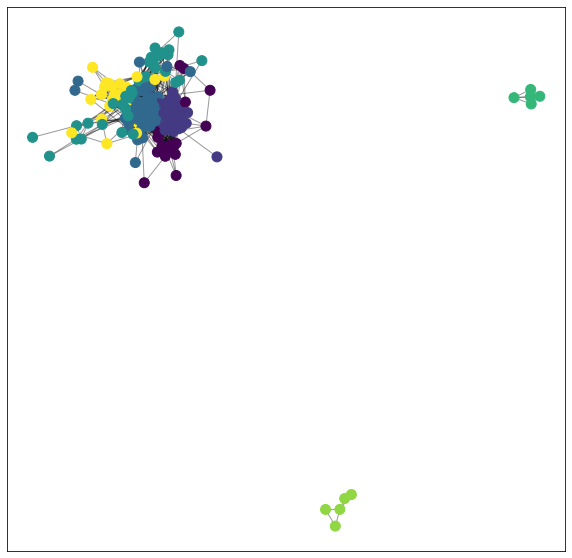

In [297]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


partition = community_louvain.best_partition(f)
plt.figure(figsize=(10,10))

# draw the graph
pos = nx.spring_layout(f)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(f, pos, alpha=0.4)
plt.show()

In [ ]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt
plt.figure(figsize=(100,100))
G = nx.from_numpy_matrix(test.values)
f = nx.Graph()                                                                                                                                     
fedges = filter(lambda x: G.degree()[x[0]] > 0 and G.degree()[x[1]] > 0, G.edges())
f.add_edges_from(fedges)
nx.draw(f, with_labels=True)


import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


partition = community_louvain.best_partition(f)
plt.figure(figsize=(10,10))

# draw the graph
pos = nx.spring_layout(f)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=100,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(f, pos, alpha=0.4)
plt.show()

In [ ]:
result.pivot(index=0, columns=1 , values='topic')

In [315]:
result[result[0]=='UCZ5PuK7lI3nbyJzF6FqGr4A'][1]

NameError: name 'result' is not defined

In [34]:
result.to_csv(r'./../../../rama1.txt', header=None, index=None, sep=',', mode='a')


In [30]:
import itertools


In [66]:
t =pd.DataFrame(list(itertools.combinations(user_topic.head(2)['user_id'],2)))
t['topic'] = 1

In [67]:
t

,0,1,topic
0,UCZ5PuK7lI3nbyJzF6FqGr4A,UCawT3eZDr1TevBhNHy-0Ilw,1


In [49]:
user_topic.to_csv("./../../../rama_data_testing.csv")

In [45]:
agg_user_topic = user_topic.groupby('user_id').agg('median')

In [46]:
agg_user_topic = agg_user_topic.reset_index()

In [47]:
agg_user_topic.head()

,user_id,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,UC8Vswk4tmtNxb73eipXBLQg,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,...,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.000571,-0.144677,-0.000571
1,UCA_MKLGMYPPfncthtkrcN0g,-0.000834,-0.000834,-0.000834,-0.000834,-0.000834,-0.000834,-0.000834,-0.000834,-0.000834,...,-0.030282,-0.000834,-0.000834,-0.020998,-0.000834,-0.000834,-0.000834,-0.000834,-0.000834,-0.000834
2,UCF3S5iELTiGWSG4uC0O4PxA,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,...,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168,-0.004168
3,UCYMPRzaW0ElU5aLZKpsuEBg,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,UCZ5PuK7lI3nbyJzF6FqGr4A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
agg_user_topic.topicID = agg_user_topic.topicID.astype(str)

In [54]:
user_topic_matrix = agg_user_topic.pivot(index='user_id', columns='topicID', values="sentiment")

In [55]:
user_topic_matrix = user_topic_matrix.fillna(0)

In [50]:
user_topic_matrix.head()

NameError: name 'user_topic_matrix' is not defined

In [57]:
user_topic_matrix.shape

(6074325, 30)

In [58]:
user_topic_matrix.to_parquet('./../../../user_topic_matrix.parquet.gzip', compression='gzip')

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph() #or G = nx.MultiDiGraph()
G.add_node('A')
G.add_node('B')
G.add_edge('A', 'B')
G.add_edge('B', 'A')
G.add_edge('B', 'A')

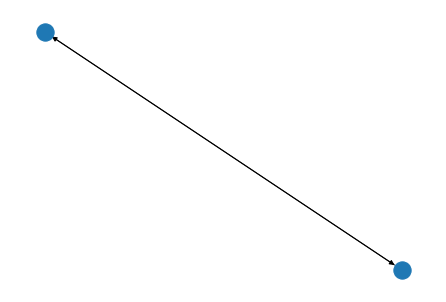

In [57]:
pos = nx.spring_layout(G)
nx.draw(G, pos)

plt.show()